<a href="https://colab.research.google.com/github/PioDru/colab/blob/main/friut_scale_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O banana.jpg https://upload.wikimedia.org/wikipedia/commons/8/8a/Banana-Single.jpg

--2024-11-24 14:46:19--  https://upload.wikimedia.org/wikipedia/commons/8/8a/Banana-Single.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2085213 (2.0M) [image/jpeg]
Saving to: ‘banana.jpg’

banana.jpg          100%[===================>]   1.99M  10.6MB/s    in 0.2s    

2024-11-24 14:46:19 (10.6 MB/s) - ‘banana.jpg’ saved [2085213/2085213]



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

labels = pd.read_csv('labels.csv')
labels_list = labels[labels.columns[0]].tolist()

# Assuming labels.csv has a column named 'filename'

labels_list[15]

'Avocado ripe'

In [ ]:
!wget -O banana.jpg https://upload.wikimedia.org/wikipedia/commons/8/8a/Banana-Single.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
86
Class: Apple Red Delicious
Confidence Score: 1.0


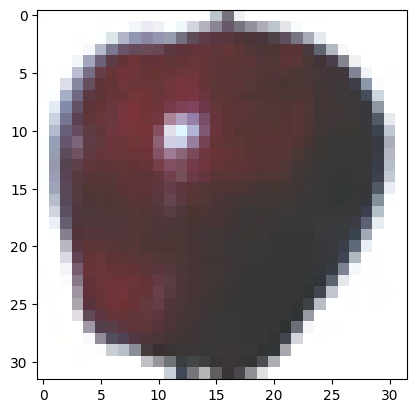

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("intelligent_scale_sg_a_pdr.keras", compile=False)
#model = load_model("C:\\Users\\depie\\Downloads\\converted_keras\\keras_model.h5", compile=False)
#model = load_model("C:\\keras_model.h5", compile=False)

# Load the labels
#class_names = open("labels.txt", "r").readlines()
class_names = labels_list

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
#data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data = np.ndarray(shape=(1, 32, 32, 3), dtype=np.float32)

# Replace this with the path to your image
#image = Image.open("test_data/avatar.png").convert("RGB")
image = Image.open("banana.jpg").convert("RGB")
#image = Image.open("banana_r_304_100.jpg").convert("RGB")
#image = Image.open("avocado_49_100.jpg").convert("RGB")
#image = Image.open("kiwi_35_100.jpg").convert("RGB")
#image = Image.open("apple_grape.jpg").convert("RGB")
#image = Image.open("apple_0_100.jpg").convert("RGB")
image = image.resize((32, 32))
image_np = np.array(image)
img = np.array([image])

# turn the image into a numpy array
image_array = np.asarray(image)
plt.imshow(image_array/255)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
#data[0] = normalized_image_array
data[0] = image_array

# Predicts the model
prediction = model.predict(data)
#print(prediction)
index = np.argmax(prediction)
print(index)

class_name = class_names[index]

confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name, end="\n")
print("Confidence Score:", confidence_score, end="\n")
